# Lab 2: UWave

Julian Lapenna

96953443

Oct 10, 15:44

In [41]:
import numpy as np
import matplotlib.pyplot as plt

Starting the lab. 

If I need to adjust the depth:

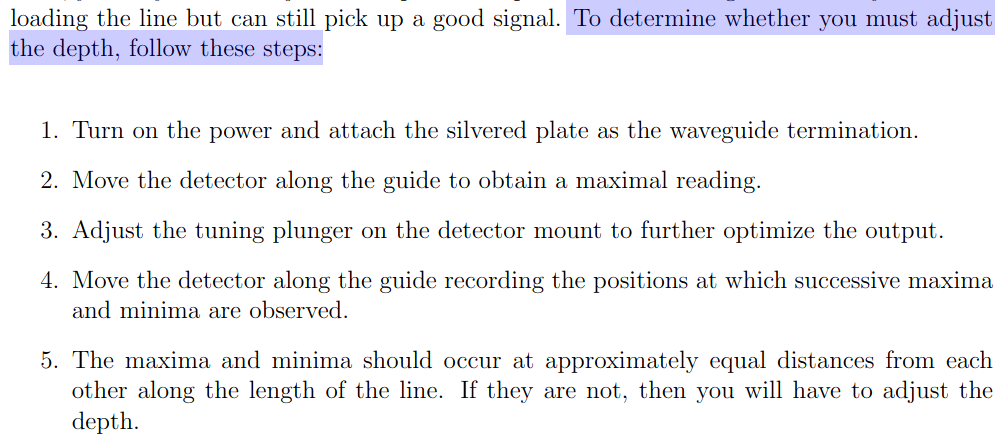

In the equpiment settings page (paper under the apparatus) it shows a a wave with y axis of mV and x axis of cm. This means, the sensor will detect the time average (mean value over time) of the signal it reads, i.e., for a sine wave and report this as a DC value into the grey box connected. What I will be looking at is how this DC value changes as I either shift the measurement device or change the end conditions of the wave.

I will try to recreate each of the plots on the parameters set up sheet (same as equipement settings page). I will put the values at the top as the settings for the function generator and try to read values on the multimeter matching the graph.

I have set my function generator to output a continuous wave (CW) with voltage $V=8.005\textrm{V}$ and current $I=0.068\textrm{A}$.

I can read a  minima at around $8.8$ cm, but then the next maxima comes at $9.95$ cm which isn't in line with the parameters set up sheet.

Return to the depth adjustment steps:
* Maxima at $9.95$ mm
* Adjusted the rod above to get a maximum reading of $152$ mV
* Adjusted x position to get minima at $10.37$ cm with reading of $0.03$ mV
* Adjusted x position to get maxima at $11.55$ cm with reading of $158$ mV

In [42]:
print((11.55+9.95)/2)

10.75


Not in the middle so I need to try again:
* I adjusted the rod to increase the maximum again at distance $11.55$ cm
* Min at $12.04$ cm
* Max at $13.10$ cm... not equispaced again
* Min at $13.71$ cm
* Max at $14.71$ cm
* Min at $15.39$ cm

Text(0.5, 1.0, 'data points while adjusting the waveguide by hand')

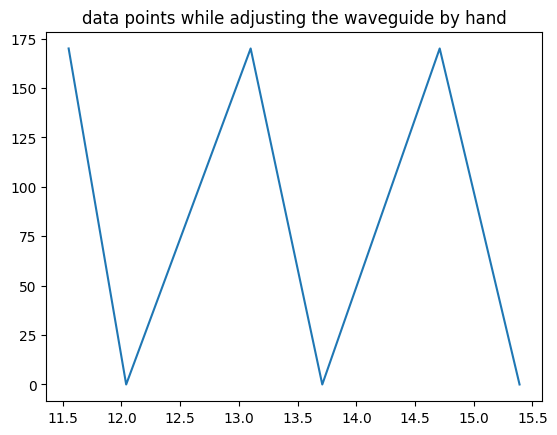

In [43]:
x = np.array([11.55, 12.04, 13.10, 13.71, 14.71, 15.39])
y = np.array([170, 0, 170, 0, 170, 0])

plt.plot(x,y)
plt.title('data points while adjusting the waveguide by hand')

Ah, so I misunderstood before, the peaks should be equispaced, and the valleys should be equispaced, but the peaks won't necessarily be equispaced between the valleys.

I have now set the micrometer to 4.165 mm.

## Micrometer set to 4.165 mm for best performance

Checking max and min points (in cm):

Maxes: 9.81, 11.47, 13.15

Mins: 8.73, 10.41, 12.07

each are read from the digital readout scale and have uncertainty of 0.005 cm.

In [44]:
print('max in middle at', (13.15 + 9.81)/2, 'cm')
print('min in middle at', (12.07 + 8.73)/2, 'cm')

print(f'the distance between the peaks is {(13.15 - 11.47):.2f} and {(-9.81 + 11.47):.2f}')
print(f'the distance between the valleys is {(10.41 - 8.73):.2f} and {(12.07 - 10.41):.2f}')

max in middle at 11.48 cm
min in middle at 10.4 cm
the distance between the peaks is 1.68 and 1.66
the distance between the valleys is 1.68 and 1.66


Great, that almost perfectly matches! Now to move on to task 1.

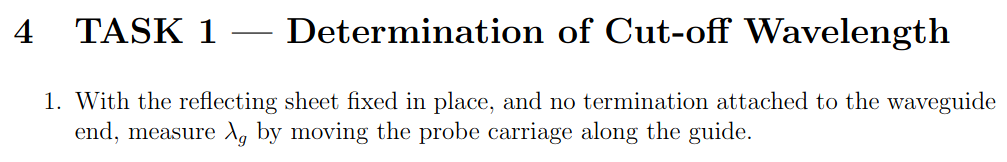

For tasks 1.1:
* Reflection plate is pressed up as close to the base of the apparatus and the distance is set to $-24.01\textrm{mm}$. Now to find two subsequent peaks/valleys.

So from the previous part, the wave length $\lambda_g = 2*1.67 = 3.34 \textrm{cm}$ after averaging the distances between peaks and valleys in each case and multiplying by 2 because it's a standing wave. Granted that's only a sample size of 4, but they seem to agree pretty closely (as in within 0.01 cm)!

## Summary: Solving for $\lambda_g = 3.34\textrm{cm}$

Open the end of the waveguide, move the probe left and right to find subsequent maxima and minima, and using those distances calculate $\lambda_g$ of the guide.

* micrometer = $4.165 \pm 0.0005 \textrm{mm}$
* power supply at $7.993 \pm 0.0005 \textrm{V}$ and $0.067 \pm 0.0005 \textrm{A}$
* measurements indicate there is a distance of $1.67 \pm 0.005 \textrm{cm}$ between subsequent peaks
* multiply that value by 2 because we have a standing wave to get the full wavelength
* $\lambda_g = 3.34\textrm{cm}$

In [45]:
lambda_g = 3.34

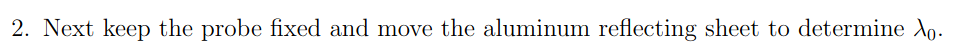

Next task, similar, but move the aluminum sheet. I start by finding a maximum point of 76.3 mV. Now I vary the aluminum sheet (initially -24.01 +- 0.005 mm) and record below.

The variations were only around 3 mV, this seems like very little so I tried adjusting the probe to a minimum and varying the aluminum sheet and I got similar results. I think it doesn't go all the way to 0 mV because there is a drastic change from waveguide to free space.

I might try using the horn transition guide next lab, but for now, I think the drastic change is causing a change in the index of refraction which results in lots of reflection at the boundary and only a little bit is getting reflected from the aluminum sheet.

Data to be acquired next time...

# 2nd session

Oct 17, 15:41

Lab topic for today: 

### Solving for $\lambda_0$ 

by keeping the probe fixed and moving the reflecting aluminum sheet.

Previously there were very small variations.

I also reviewed my calculations and fixed a factor of two that was missing previously.

Params on start:

* micrometer = $4.165 \pm 0.0005\ \textrm{mm}$
* PSU voltage at $7.999 \pm 0.0005\ \textrm{V}$ 
* PSU current at $0.068 \pm 0.0005\ \textrm{A}$
* Probe at position $15.97 \pm 0.005\ \textrm{mm}$ (maximum position from moving prob to get highest resolution)
* Probe reading of $80.1 \pm 0.5\ \textrm{mV}$

**To find:** Positions of the aluminum sheet that give maxima or minima.

In [46]:
max_distances = [3.04, 16.16, 29.80] # in [mm]
min_distances = [9.01, 22.16, 36,27] # in [mm]

diffs = [
    max_distances[1] - max_distances[0],
    max_distances[2] - max_distances[1],
    min_distances[1] - min_distances[0],
    min_distances[2] - min_distances[1]
    ]

print(f'the distance between the peaks is {(diffs[0]):.2f} and {(diffs[1]):.2f}')
print(f'the distance between the valleys is {(diffs[2]):.2f} and {(diffs[3]):.2f}')

the distance between the peaks is 13.12 and 13.64
the distance between the valleys is 13.15 and 13.84


These values were found with minima having a (fluctating) voltage of $78.1 \pm 0.5\ \textrm{V}$ and maxima of $81.6 \pm 0.5\ \textrm{V}$. I found this by inspection, i.e., visually watching the DAQ probe value readout.

Changing units to $\textrm{cm}$, multiplying by 2 for standing wave, and then averaging the 4 reads I get:

In [47]:
MM_TO_CM = 1/10
lambda_0 = np.sum(diffs) / len(diffs) * MM_TO_CM * 2

print(lambda_0)

2.6875


### $\lambda_0 = 2.69 \textrm{cm}$

Uncertainty measurements are all included above and will be propagated and summarized later.

Observations:
- $\lambda_g > \lambda_0$
- both are pretty small, but then again, I don't know how big they should be since this is my first time working with physical waveguides

### Part 4.3

Measuring the waveguide w calipers

$a = 23.45 \pm 0.005 \textrm{mm}$\
$b = 10.16 \pm 0.005 \textrm{mm}$

Now I will use this to calculate $\lambda_c$ in two different ways.

First way: 

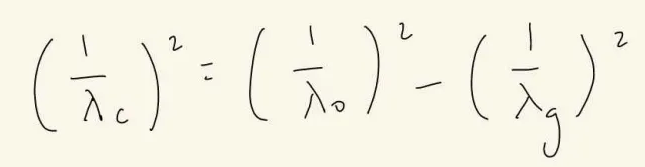

Rearranging this equation, we get $\lambda_c = \frac{1}{\sqrt{(1/\lambda_0)^2-(1/\lambda_g)^2}}$

In [48]:
lambda_c = 1/np.sqrt((1/lambda_0)**2 - (1/lambda_g)**2)
lambda_c

4.5262243031971074

### Method 1: $\lambda_c = 4.53\ \textrm{cm}$

Second way: 

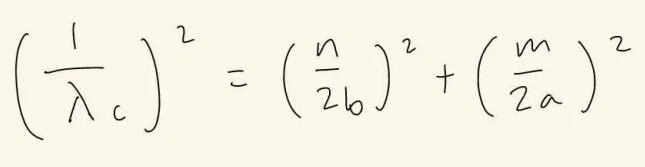

and here we only care about $ m = 1 $ and $ n = 0 $ because in the lab text it explains:

> In the present experiment, since $b < a$, the cutoff frequencies for all modes other than the first mode ($TE_{10}$) are higher than the frequencies available from the source

So this is pretty easy to compute, it simplifies to $\lambda_c = 2a$

In [49]:
a = 2.345 # in [cm]
lambda_c2 = 2*a
lambda_c2

4.69

### Method 2: $\lambda_c = 4.69\ \textrm{cm}$

That seems pretty close, how far apart are they?

In [50]:
error_lambda_c = np.abs(lambda_c2 - lambda_c) / min(lambda_c, lambda_c2)
error_lambda_c

0.0361837341307212

Not bad, about 3.6% error. I consider that to be quite accurate, at least for my first lab of this style.

# Section 5: Task 2 Impedance measurement

### 5.1 VSWR of the closed waveguide

Back to taking measurements again. Close the end of the waveguide, adjust the probe as necessary (see 1st lab session) and take note of subsequent maxima and minima. Using those, calculate the distance between them to find wavelength, and the voltage ratio of maxima to minima to find the VSWR.

The maximum readings fluctuate up to $\pm 0.1\ \textrm{mV}$\
The minimum readings fluctuate up to $\pm 0.0005\ \textrm{mV}$

In [51]:
max_voltages = [173.5, 176.3, 174.2]
min_voltages = [0.021, 0.023, 0.024]

avg_max_volt = np.average(max_voltages)
avg_min_volt = np.average(min_voltages)

VSWR = avg_max_volt/avg_min_volt
VSWR

7705.882352941176

Awesome!

# $\textrm{VSWR}_{\textrm{closed end}} = 7705$

(again uncertainties will be propagated later)

For now, this is pretty good considering it should be infinite. It is definitely large relative to the other values I have been reading so that's promising.

For the fractional wavelength from the end of the waveguide we can only measure from 8cm from the end onwards which I was previously using as my datum. Instead, calculating the absolute, I can extrapolate backwards:

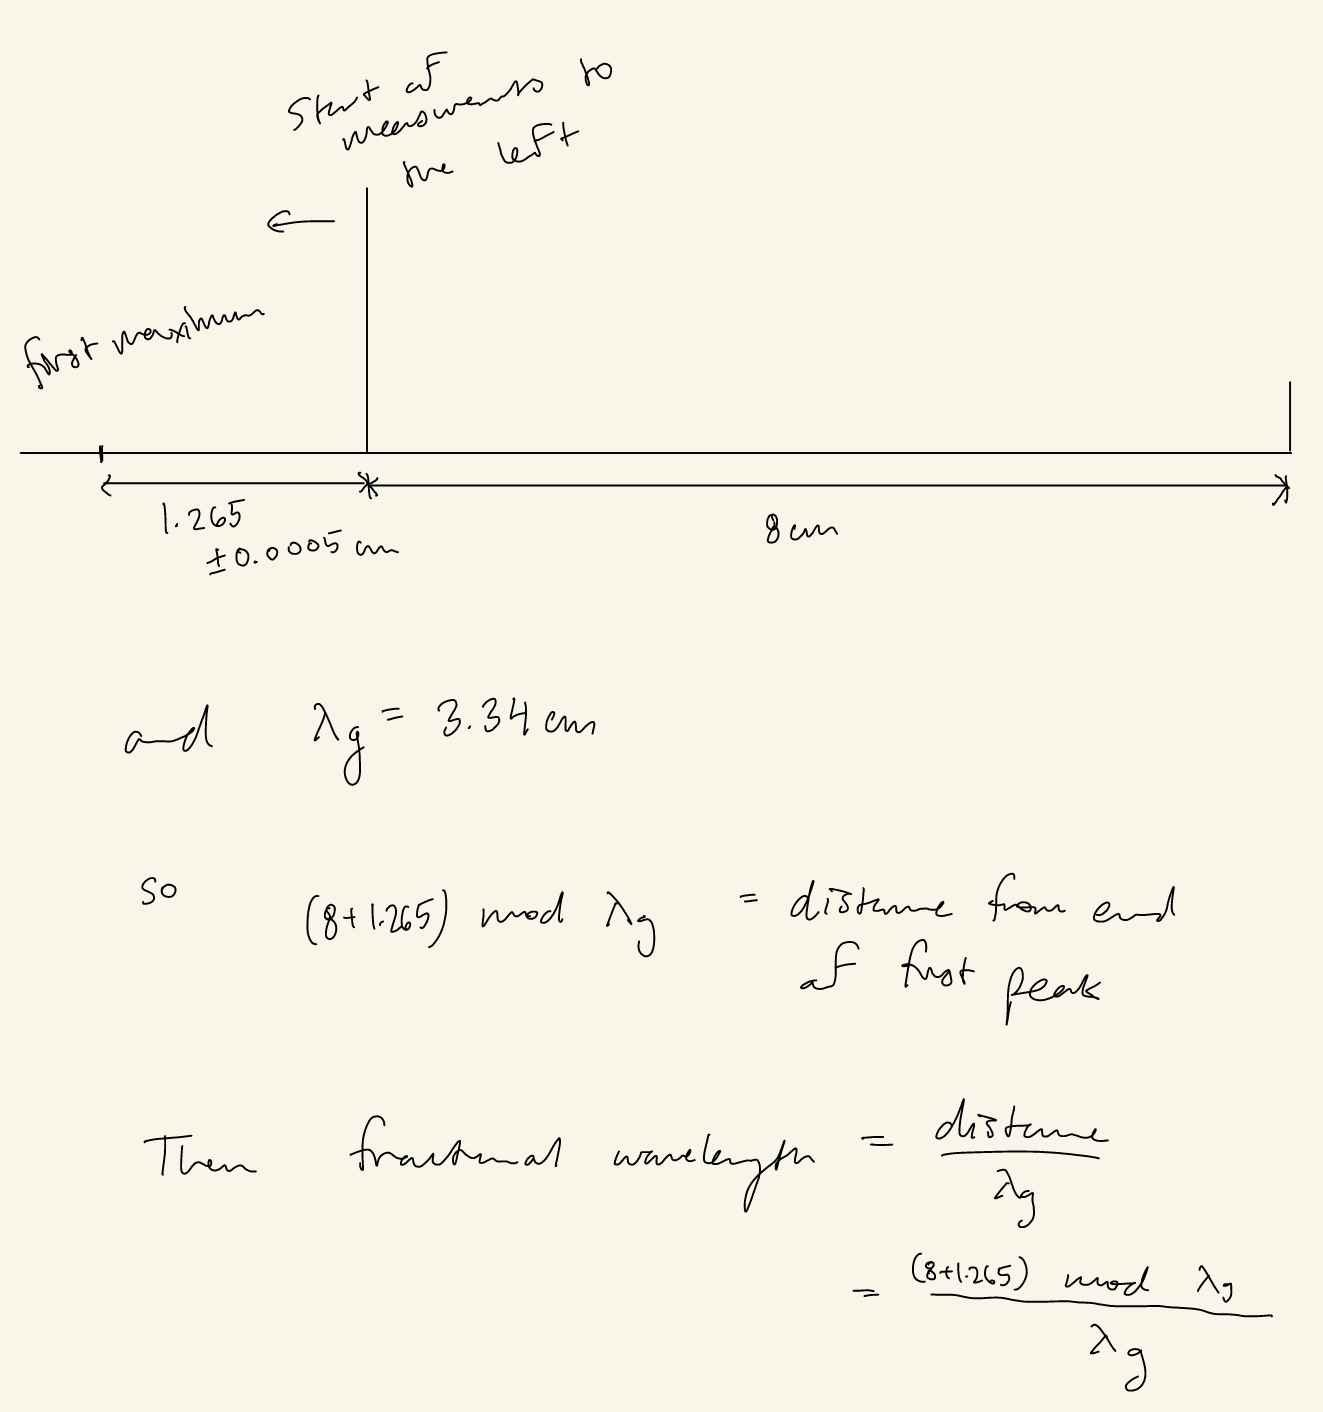

This image shows the point of the first peak on the left, then at the 8cm mark, the furthest point I can probe on the waveguide, then at the far right at 0cm is the end of the waveguide. So from the calculation, I can calculate the distance that doesn't fit into a wavelength that is left over at the end.

### Correction: I need to do modulus with ($\lambda_g/2$) 


#### correctly done in code below



In [52]:
first_peak_dist = 1.265 + 8
frac_wavelen = (first_peak_dist % (lambda_g/2)) / lambda_g
frac_wavelen

0.27395209580838353

### Fractional wavelength = 0.274

So this isn't perfect, but it's close. According to theory it should be at $1/4$ (see image from lab manual):

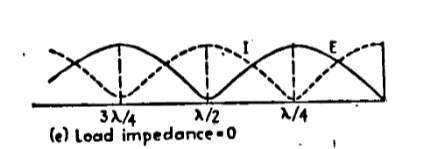

The error from theory is:

In [53]:
error_frac_w = np.abs(frac_wavelen - 0.25) / min(frac_wavelen, 0.25)
error_frac_w

0.09580838323353413

9.5% error on the fractional wavelength is a bit large.

Observation: likely there is error accumulating in the position at which I measured the maximum as well as the computed value for $\lambda_g$.

## 5.2 VSWR of absorbing wall

I replaced the wall with the absorption padding so that no waves are reflected back, the waveguide is open with no attachment.

I will now (again) find the closest  measurable maximum and extrapolate for the portion of the waveguide that I cannot measure where the closest maximum to the end of the guide is.


End of lab data dump:

Maxes:
- $78.10 \pm 0.05\ \textrm{mV}$ at $15.91 \pm 0.005\ \textrm{mm}$
- $76.58 \pm 0.05\ \textrm{mV}$ at $32.53 \pm 0.005\ \textrm{mm}$
- $77.35 \pm 0.05\ \textrm{mV}$ at $49.36 \pm 0.005\ \textrm{mm}$

Mins:
- $32.52 \pm 0.05\ \textrm{mV}$ at $7.29 \pm 0.005\ \textrm{mm}$
- $31.72 \pm 0.05\ \textrm{mV}$ at $24.19 \pm 0.005\ \textrm{mm}$
- $32.73 \pm 0.05\ \textrm{mV}$ at $40.79 \pm 0.005\ \textrm{mm}$

# Oct 24  15:20

Third week of UWave lab, continuing from last week with the following steps, I will get my data for 5.3 and 5.4 along with uncertainties and then calculate afterwards.

Today's set up:

* micrometer = $4.165 \pm 0.0005\ \textrm{mm}$
* PSU voltage at $8.005 \pm 0.0005\ \textrm{V}$ 
* PSU current at $0.068 \pm 0.0005\ \textrm{A}$
* Probe at position $12.57 \pm 0.005\ \textrm{mm}$ (maximum position from moving prob to get highest resolution while end is closed)
* Probe reading of $180.33 \pm 0.5\ \textrm{mV}$

Edit (Nov 1, 13:16): I had taken notes on my tablet but did not transfer them, so then during the Oct 30 session (next block) I transferred them to the notebook.

# Oct 30, 14:42 Transfering data from written notes to git notebook

## 5.3 Measurements with a horn

For this section I attached the long horn onto the end of the waveguide and screwed in the top two tighteners. I also adjusted the foam and wall to not reflect any waves back. Data:

Maximums:
- $60.58 \pm 0.03\ \textrm{mV}$ at $0.11 \pm 0.005\ \textrm{mm}$
- $60.52 \pm 0.02\ \textrm{mV}$ at $17.40 \pm 0.005\ \textrm{mm}$
- $60.09 \pm 0.03\ \textrm{mV}$ at $33.93 \pm 0.005\ \textrm{mm}$

Minimums:
- $48.45 \pm 0.02\ \textrm{mV}$ at $9.33 \pm 0.005\ \textrm{mm}$
- $48.85 \pm 0.02\ \textrm{mV}$ at $25.85 \pm 0.005\ \textrm{mm}$
- $49.03 \pm 0.02\ \textrm{mV}$ at $42.91 \pm 0.005\ \textrm{mm}$

Now up to date.

Additionally, to prepare for tomorrow's lab I will learn about the Smith Chart so I can ask questions.

This video https://youtu.be/rUDMo7hwihs by Rhode & Schwarz seems like a good explanation.

# Oct 31, 17:01

Lab session

For today, no data collection, just reviewing the math and plotting using the Smith Chart.

## Understanding the Smith Chart and our experiment

After talking with the TAs and Jens, as well as reading through the reference material again, I have the following understanding and notes about the Smith Chart and what we are measuring for our experiment.

### Smith chart:
- Typically used to design matching networks to minimize impedance matching
- The smith chart is normalized for the impedance of the generator $z_0$
- Along the circumferences of circles, there is constant resistance
- Along the curves connecting the point (1, 0) to the circumference of the unit circle, there is constant reactance
- For a given point, following the circle and curve will find the resistance and reactance, and from there the impedance is $Z = R + jX$

### Our experiment:
- Our experiment is a bit backwards because typically the Smith chart is used to design for minimizing imedance matching, but this time we're using data to calculate the impedance between interfaces
- Our data: VSWR and distance of first peak to load
- What we need to do:
    - Use the VSWR to calculate the magnitude of the complex reflection coefficient of the load $\displaystyle|\Gamma_L| = \frac{\textrm{VSWR} - 1}{\textrm{VSWR} + 1}$
    - We can then plot a circle of this in the complex plane $|z| = |\Gamma_L|$ (green circle on the graph below)
    - Next we need to find the phase angle at the interface using information of the distance from the load
    - This can be calculated by starting at the intersection of our circle and the positive x axis (Re(z) axis) and moving clockwise by an angle $\phi$ (image 2)
    - The phase angle is calculated by $\phi = d\times2\pi$ where $d$ is the fractional wavelength $d=\lambda_f*(\lambda_g/2)$, so that $\displaystyle\phi = \lambda_f\bigg(\frac{4\pi}{\lambda_g}\bigg)$
    - The point given by this magnitude and angle $\Gamma_0$ represents the impedance at the interface! To understand how it represents the impedance, overlay the smith chart with the center at the origin $O$
    - Moving along the red circle to the point $R_n$ lets us find the normalized impedance
    - Moving along the blue curve to the point $X_n$ lets us find the normalized reactance
    - Then we can calculate the normalized impedance $Z_n = R_n + jX_n$ of the load!
    - Finally, the true impedance of the load $Z_L = Z_n*Z_0$
    
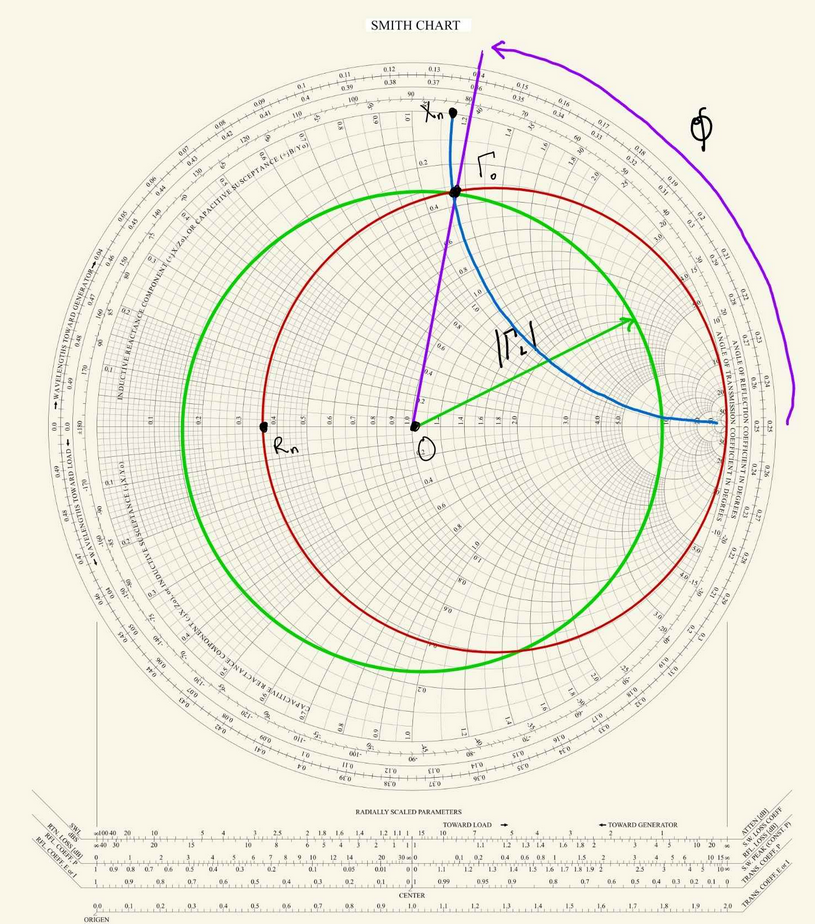

My process Smith Chart drawing

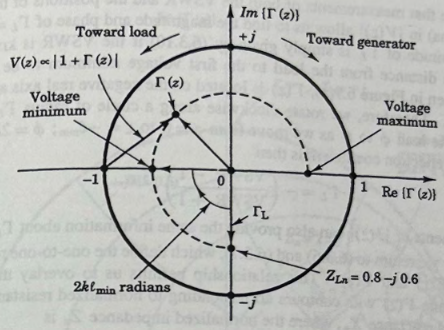

Chart from the readings demonstrating how to locate $\phi$ from the distance of the voltage maximum from the load

Now, I will put my data to use, and find the impedance of each interface and calculate the respective uncertainties in each.

### Uncertainty in Smith chart
Plan for taking uncertainty:
- Propagate uncertainties as normal using uncertainty propagation rules:
- Once I have the uncertainty in $\phi$ and $|\Gamma_L|$ use the maximums to find the theoretical maximum and minimum impedance at the interface and use those for uncertainty
- Comment and discuss sources of uncertainty

# Nov 1, 12:16

Coding functions to calculate my impedance.

Uncertainty guide: [libretexts](https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Supplemental_Modules_(Analytical_Chemistry)/Quantifying_Nature/Significant_Digits/Propagation_of_Error)

Edited: Nov 2, 16:32 to fix the fractional wavelength uncertainty propagation, and lambda_g np.array casting

In [103]:
def get_VSWR(min_voltages, max_voltages, min_uncerts, max_uncerts) -> tuple[float, float]:
    """
    Assumes min_voltages and max_voltages are arrays of the measured minimum and maximum voltages,
    and their respective uncertainties in min_uncerts and max_uncerts.

    Returns a tuple of the VSWR and its uncertainty.
    """
    avg_min_volt = np.average(min_voltages)
    avg_max_volt = np.average(max_voltages)

    min_uncert = np.sqrt(np.sum(min_uncerts**2))  # libretexts (10)
    max_uncert = np.sqrt(np.sum(max_uncerts**2))  # libretexts (10)

    VSWR = avg_max_volt/avg_min_volt
    uncert_VSWR = VSWR*np.sqrt((max_uncert/avg_max_volt)**2 + (min_uncert/avg_min_volt)**2)  # libretexts (11)

    return VSWR, uncert_VSWR

def get_complex_reflection_coefficient(VSWR, uncert_VSWR) -> tuple[float, float]:
    """
    Returns the complex reflection coefficient from the VSWR and its uncertainty.
    """
    gamma = (VSWR - 1) / (VSWR + 1)
    uncert_gamma = gamma*np.sqrt((uncert_VSWR/(VSWR+1))**2 + (uncert_VSWR/(VSWR-1))**2)  # libretexts (11)

    return gamma, uncert_gamma

def get_phase_angle(lambda_g, lambda_f, uncert_lambda_g, uncert_lambda_f) -> tuple[float, float]:
    """
    Returns the phase angle and its uncertainty from the guide wavelength and free-space wavelength.
    """
    phase_angle = 4*np.pi*lambda_f / lambda_g
    uncert_phase_angle = phase_angle*np.sqrt((uncert_lambda_g/lambda_g)**2 + (uncert_lambda_f/lambda_f)**2)  # libretexts (11)

    return phase_angle, uncert_phase_angle

def get_lambda_g(minv_positions, maxv_positions, minv_uncerts, maxv_uncerts) -> tuple[float, float]:
    """
    Assumes minv_positions and maxv_positions are arrays of the measured positions of min and max voltages,
    and their respective uncertainties in minv_uncerts and maxv_uncerts.

    Returns a tuple of the lambda_g and its uncertainty.
    """
    def calculate_diffs(values, uncertainties):
        diffs = np.diff(values)
        uncerts = np.add(uncertainties[:-1], uncertainties[1:])
        return np.array(diffs), np.array(uncerts)

    min_diffs, min_uncerts = calculate_diffs(minv_positions, minv_uncerts)
    max_diffs, max_uncerts = calculate_diffs(maxv_positions, maxv_uncerts)

    lambda_g = 2*np.average([np.average(min_diffs), np.average(max_diffs)])
    uncert_lg = 2*np.sqrt(np.sum(max_uncerts**2) + np.sum(min_uncerts**2)) # libretexts (10)

    return lambda_g, uncert_lg

def get_lambda_f(first_peak_dist, lambda_g, first_peak_dist_uncert, lambda_g_uncert) -> tuple[float, float]:
    """
    Returns a tuple of the lambda_f and its uncertainty.
    """
    WAVEGUIDE_END_LENGTH = 8.00  # [mm]
    total_distance = first_peak_dist + WAVEGUIDE_END_LENGTH
    frac_wavelen = (total_distance % (lambda_g/2)) / (lambda_g/2)
    # there is no established uncertainty propagation that I could find for modulus so I will use the relative
    # division propagation rule because that seems to be the closest to me
    frac_wavelen_uncert = frac_wavelen*np.sqrt((first_peak_dist_uncert/total_distance)**2 + (lambda_g_uncert/lambda_g)**2)  # libretexts (11)

    return frac_wavelen, frac_wavelen_uncert

Note: The input data will have to be defined as numpy arrays so that I actually take the element-wise squares.

I have gone back through the lab and added minor comments and edits where necessary to add detail. Some are timestamped if it is unclear, but mostly just adding descriptive words.

# Nov 2, 15:37

To verify these functions, I will usem to calculate the VSWR of the closed waveguide which I did earlier.

Additionally, I will put all my collected data here for reference moving forward. All position values are measured from the furthest position measurable, so 0mm would correlate to 8mm from the end of the waveguide:

## Open end, absorbing wall

Maxes:
- $78.10 \pm 0.05\ \textrm{mV}$ at $15.91 \pm 0.005\ \textrm{mm}$
- $76.58 \pm 0.05\ \textrm{mV}$ at $32.53 \pm 0.005\ \textrm{mm}$
- $77.35 \pm 0.05\ \textrm{mV}$ at $49.36 \pm 0.005\ \textrm{mm}$

Mins:
- $32.52 \pm 0.05\ \textrm{mV}$ at $7.29 \pm 0.005\ \textrm{mm}$
- $31.72 \pm 0.05\ \textrm{mV}$ at $24.19 \pm 0.005\ \textrm{mm}$
- $32.73 \pm 0.05\ \textrm{mV}$ at $40.79 \pm 0.005\ \textrm{mm}$

## Horn end, absorbing wall

Maximums:
- $60.58 \pm 0.03\ \textrm{mV}$ at $0.11 \pm 0.005\ \textrm{mm}$
- $60.52 \pm 0.02\ \textrm{mV}$ at $17.40 \pm 0.005\ \textrm{mm}$
- $60.09 \pm 0.03\ \textrm{mV}$ at $33.93 \pm 0.005\ \textrm{mm}$

Minimums:
- $48.45 \pm 0.02\ \textrm{mV}$ at $9.33 \pm 0.005\ \textrm{mm}$
- $48.85 \pm 0.02\ \textrm{mV}$ at $25.85 \pm 0.005\ \textrm{mm}$
- $49.03 \pm 0.02\ \textrm{mV}$ at $42.91 \pm 0.005\ \textrm{mm}$

## Closed end

Maximums:
- $173.5 \pm 0.1\ \textrm{mV}$ at $12.91 \pm 0.005\ \textrm{mm}$
- $176.3 \pm 0.1\ \textrm{mV}$ at $29.15 \pm 0.005\ \textrm{mm}$
- $174.2 \pm 0.1\ \textrm{mV}$ at $46.42 \pm 0.005\ \textrm{mm}$

Minimums:
- $0.021 \pm 0.0005\ \textrm{mV}$ at $21.19 \pm 0.005\ \textrm{mm}$
- $0.023 \pm 0.0005\ \textrm{mV}$ at $37.94 \pm 0.005\ \textrm{mm}$
- $0.024 \pm 0.0005\ \textrm{mV}$ at $54.45 \pm 0.005\ \textrm{mm}$


## Note on uncertainty:

- Instrument uncertainty: taken into account
- Human uncertainty: **somewhat(?)** taken into account

More specifically, I am realising that while I have recorded the uncertainty of the precision of each measurement device, I have not recorded all the uncertainty in my own judgements for maxima and minima readings. This mainly applies to maxima readings, but also many of the minima readings, where there is no "sharp" drop off.

Since there is a wide range that will read all nearly the same value around the maxima, and since the digital readout fluctates constantly, there is no guarantee that I have chosen the actual location for the maxima/minima. I should have found the range and taken that to be my uncertainty in position. Because I didn't record this range initially, I will continue with the instrument uncertainty that I've recorded and leave this note for reference that it should be greater, but I don't know by how much.

This is illustrated by the following images:

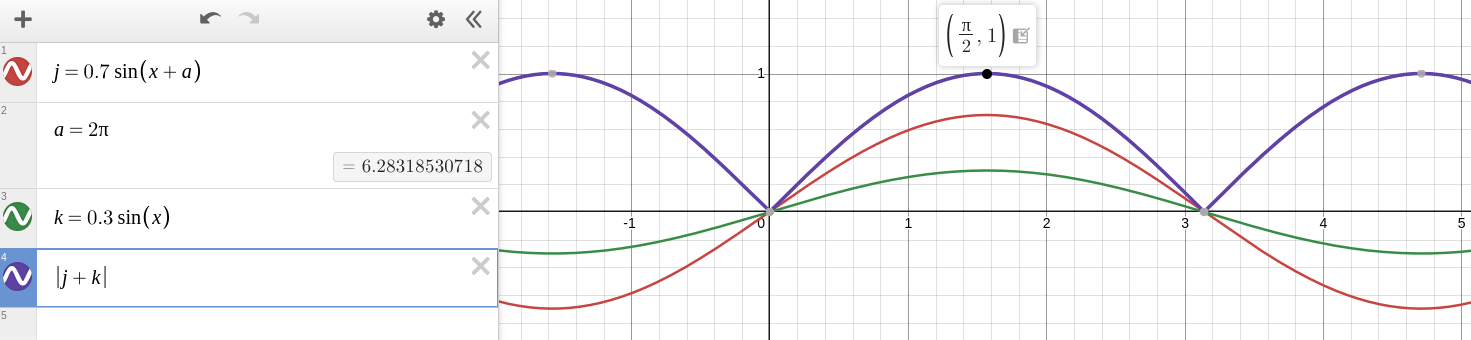

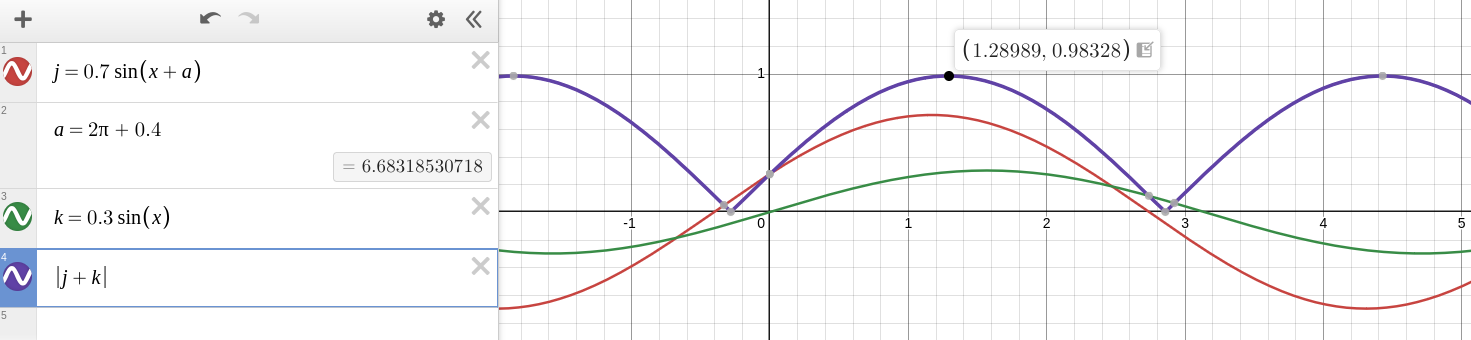

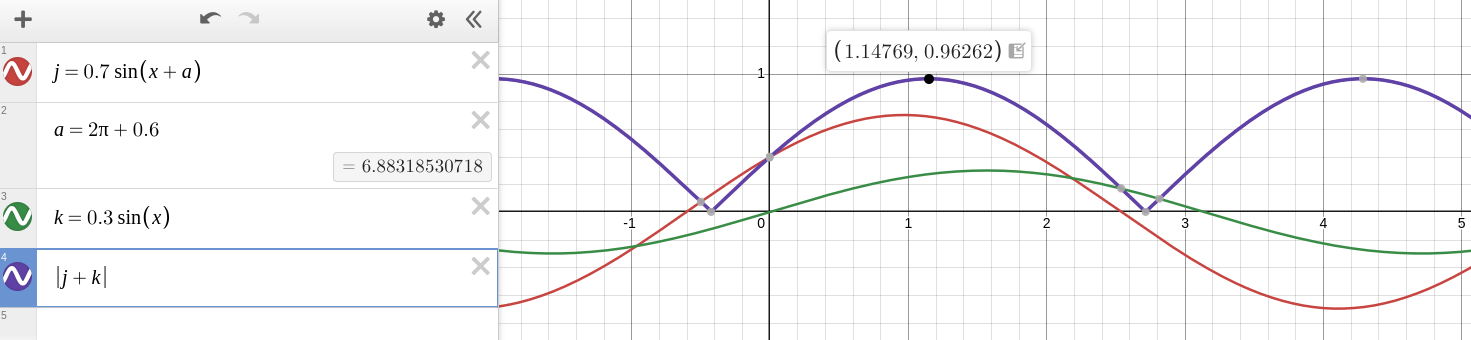

In the 3 images above, I am representing the wave of the experiment:

* As $a$ changes, the maximum of the purple wave (the sum of the incident and reflected wave) is what is being measured. 
* When both the red and green waves are in line as in image 1, the purple reaches a maxima. 
* However in image 2, shifting away from the maxima a little bit (~6.5% of a period) on either side still results in the purple wave maxima being very close to the actual maxima. Close enough that the fluctations in the readings make it uncertain where exactly the maxima is.
* Only by the 3rd image (~10% of a period away) is there a clear difference in amplitude.
* In the case of pure reflection in the closed guide, this only matters for maxima since the minima cancels almost completely making a very sharp (and easy to locate) drop off

Additionally, uncertainty in the voltage fluctuations isn't easy to quantify and there is no "good" approach that I could come up with. So the best I could do was watch the voltage fluctuations for a few seconds and estimate the average and uncertainty to best I could.

Back to the computations, putting the values into code:

In [66]:
# Open end, absorbing wall
open_end_maxima = np.array([78.10, 76.58, 77.35])  # mV values
open_end_maxima_uncert = np.array([0.05, 0.05, 0.05])  # mV uncertainties
open_end_maxima_positions = np.array([15.91, 32.53, 49.36])  # mm positions
open_end_maxima_positions_uncert = np.array([0.005, 0.005, 0.005])  # mm uncertainties

open_end_minima = np.array([32.52, 31.72, 32.73])  # mV values
open_end_minima_uncert = np.array([0.05, 0.05, 0.05])  # mV uncertainties
open_end_minima_positions = np.array([7.29, 24.19, 40.79])  # mm positions
open_end_minima_positions_uncert = np.array([0.005, 0.005, 0.005])  # mm uncertainties

# Horn end, absorbing wall
horn_end_maxima = np.array([60.58, 60.52, 60.09])  # mV values
horn_end_maxima_uncert = np.array([0.03, 0.02, 0.03])  # mV uncertainties
horn_end_maxima_positions = np.array([0.11, 17.40, 33.93])  # mm positions
horn_end_maxima_positions_uncert = np.array([0.005, 0.005, 0.005])  # mm uncertainties

horn_end_minima = np.array([48.45, 48.85, 49.03])  # mV values
horn_end_minima_uncert = np.array([0.02, 0.02, 0.02])  # mV uncertainties
horn_end_minima_positions = np.array([9.33, 25.85, 42.91])  # mm positions
horn_end_minima_positions_uncert = np.array([0.005, 0.005, 0.005])  # mm uncertainties

# Closed end
closed_end_maxima = np.array([173.5, 176.3, 174.2])  # mV values
closed_end_maxima_uncert = np.array([0.1, 0.1, 0.1])  # mV uncertainties
closed_end_maxima_positions = np.array([12.91, 29.15, 46.42])  # mm positions
closed_end_maxima_positions_uncert = np.array([0.005, 0.005, 0.005])  # mm uncertainties

closed_end_minima = np.array([0.021, 0.023, 0.024])  # mV values
closed_end_minima_uncert = np.array([0.0005, 0.0005, 0.0005])  # mV uncertainties
closed_end_minima_positions = np.array([21.19, 37.94, 54.45])  # mm positions
closed_end_minima_positions_uncert = np.array([0.005, 0.005, 0.005])  # mm uncertainties

So starting with the VSWR and other calculations for the closed end:

In [100]:
VSWR, VSWR_uncert = get_VSWR(closed_end_minima, closed_end_maxima, closed_end_minima_uncert, closed_end_maxima_uncert)
print(f'VSWR: {VSWR:.2f} ± {VSWR_uncert:.2f}')

VSWR: 7705.88 ± 294.52


That seems to line up! with the earlier result that I calculated. I will now do the closed guide wavelength $\lambda_g$ and the fractional wavelength $\lambda_f$.

In [101]:
lg, lg_uncert = get_lambda_g(closed_end_minima_positions, closed_end_maxima_positions, closed_end_minima_positions_uncert, closed_end_maxima_positions_uncert)
print(f'λ_g: {lg:.2f} ± {lg_uncert:.2f} mm')

λ_g: 33.39 ± 0.04 mm


This also matches what I calculated earlier, so good so far!

In [104]:
lf, lf_uncert = get_lambda_f(closed_end_maxima_positions[0], lg, closed_end_maxima_positions_uncert[0], lg_uncert)
print(f'λ_f: {lf:.4f} ± {lf_uncert:.4f}')

λ_f: 0.2527 ± 0.0003


Woah! This is much better than my previous measurement. I think this is likely because I was more precise on finding the maximum position than I was on the first attempt earlier. I also thought that I had no uncertainty because I was originally only looking to 2 sig figs, but showing 4 sig figs shows that there is some uncertainty.

Again, this uncertainty is a little questionable because there is no clear method for deriving the uncertianty of the modulus when there is uncertainty in both elements in the operation.

Now for the bulk of the data:

In [108]:
print("Closed end:\n")
closed_VSWR, closed_VSWR_uncert = get_VSWR(closed_end_minima, closed_end_maxima, closed_end_minima_uncert, closed_end_maxima_uncert)
print(f'VSWR: {closed_VSWR:.2f} ± {closed_VSWR_uncert:.2f}')
closed_reflection_coeff, closed_reflection_coeff_uncert = get_complex_reflection_coefficient(closed_VSWR, closed_VSWR_uncert)
print(f'reflection coefficient: {closed_reflection_coeff:.3f} ± {closed_reflection_coeff_uncert:.3f}')
closed_lg, closed_lg_uncert = get_lambda_g(closed_end_minima_positions, closed_end_maxima_positions, closed_end_minima_positions_uncert, closed_end_maxima_positions_uncert)
closed_lf, closed_lf_uncert = get_lambda_f(closed_end_maxima_positions[0], closed_lg, closed_end_maxima_positions_uncert[0], closed_lg_uncert)
closed_phase_angle, closed_phase_angle_uncert = get_phase_angle(closed_lg, closed_lf, closed_lg_uncert, closed_lf_uncert)
print(f'phase angle: {closed_phase_angle:.2f} ± {closed_phase_angle_uncert:.4f} radians')
print(f'phase angle: {closed_phase_angle*180/np.pi:.2f} ± {closed_phase_angle_uncert*180/np.pi:.4f} degrees')

print()
print('---------------------------------')
print()

print("Open end:\n")
open_VSWR, open_VSWR_uncert = get_VSWR(open_end_minima, open_end_maxima, open_end_minima_uncert, open_end_maxima_uncert)
print(f'VSWR: {open_VSWR:.2f} ± {open_VSWR_uncert:.2f}')
open_reflection_coeff, open_reflection_coeff_uncert = get_complex_reflection_coefficient(open_VSWR, open_VSWR_uncert)
print(f'reflection coefficient: {open_reflection_coeff:.3f} ± {open_reflection_coeff_uncert:.3f}')
open_lg, open_lg_uncert = get_lambda_g(open_end_minima_positions, open_end_maxima_positions, open_end_minima_positions_uncert, open_end_maxima_positions_uncert)
open_lf, open_lf_uncert = get_lambda_f(open_end_maxima_positions[0], open_lg, open_end_maxima_positions_uncert[0], open_lg_uncert)
open_phase_angle, open_phase_angle_uncert = get_phase_angle(open_lg, open_lf, open_lg_uncert, open_lf_uncert)
print(f'phase angle: {open_phase_angle:.2f} ± {open_phase_angle_uncert:.4f} radians')
print(f'phase angle: {open_phase_angle*180/np.pi:.2f} ± {open_phase_angle_uncert*180/np.pi:.4f} degrees')

print()
print('---------------------------------')
print()

print("Horn end:\n")
horn_VSWR, horn_VSWR_uncert = get_VSWR(horn_end_minima, horn_end_maxima, horn_end_minima_uncert, horn_end_maxima_uncert)
print(f'VSWR: {horn_VSWR:.2f} ± {horn_VSWR_uncert:.2f}')
horn_reflection_coeff, horn_reflection_coeff_uncert = get_complex_reflection_coefficient(horn_VSWR, horn_VSWR_uncert)
print(f'reflection coefficient: {horn_reflection_coeff:.3f} ± {horn_reflection_coeff_uncert:.3f}')
horn_lg, horn_lg_uncert = get_lambda_g(horn_end_minima_positions, horn_end_maxima_positions, horn_end_minima_positions_uncert, horn_end_maxima_positions_uncert)
horn_lf, horn_lf_uncert = get_lambda_f(horn_end_maxima_positions[0], horn_lg, horn_end_maxima_positions_uncert[0], horn_lg_uncert)
horn_phase_angle, horn_phase_angle_uncert = get_phase_angle(horn_lg, horn_lf, horn_lg_uncert, horn_lf_uncert)
print(f'phase angle: {horn_phase_angle:.2f} ± {horn_phase_angle_uncert:.4f} radians')
print(f'phase angle: {horn_phase_angle*180/np.pi:.2f} ± {horn_phase_angle_uncert*180/np.pi:.4f} degrees')

Closed end:

VSWR: 7705.88 ± 294.52
reflection coefficient: 1.000 ± 0.054
phase angle: 0.10 ± 0.0002 radians
phase angle: 5.45 ± 0.0093 degrees

---------------------------------

Open end:

VSWR: 2.39 ± 0.01
reflection coefficient: 0.411 ± 0.002
phase angle: 0.16 ± 0.0003 radians
phase angle: 9.22 ± 0.0157 degrees

---------------------------------

Horn end:

VSWR: 1.24 ± 0.00
reflection coefficient: 0.106 ± 0.001
phase angle: 0.18 ± 0.0003 radians
phase angle: 10.28 ± 0.0184 degrees


Now using this I can plot using the Smith chart, which I will do by hand and calculate the corresponding impedances:

Closed end:

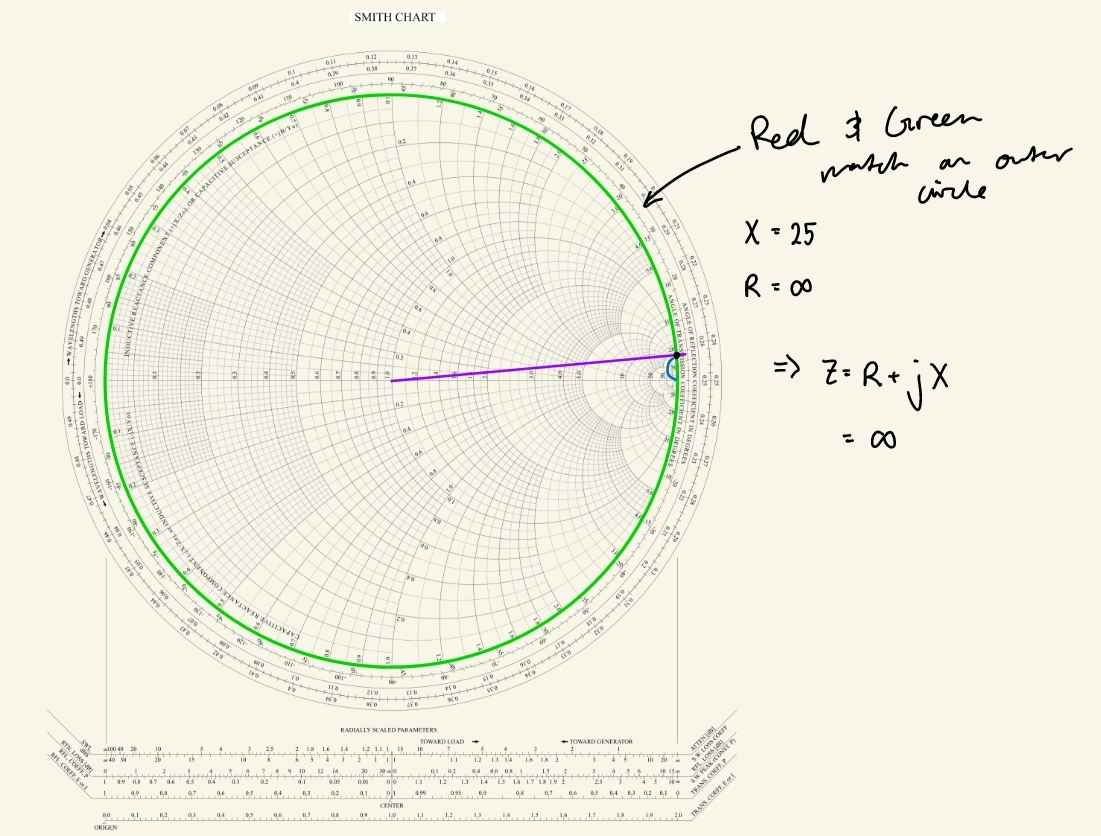

Open end:

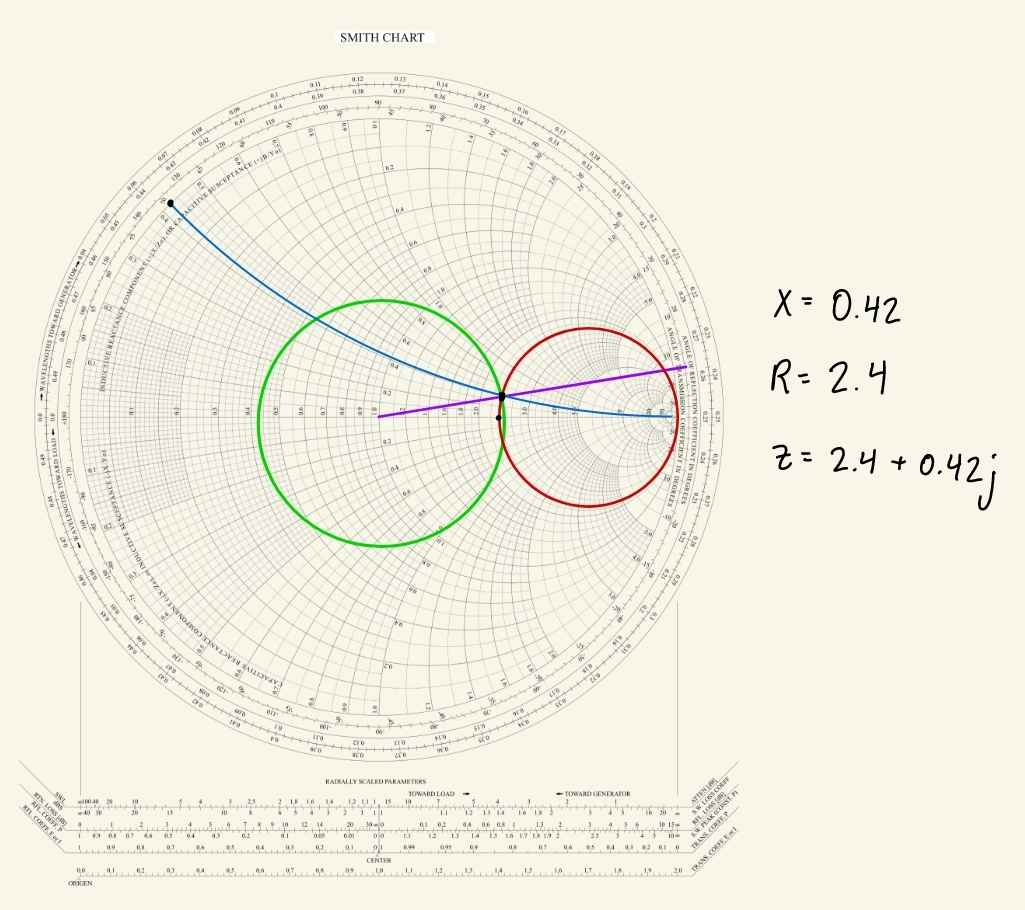

Horn end:

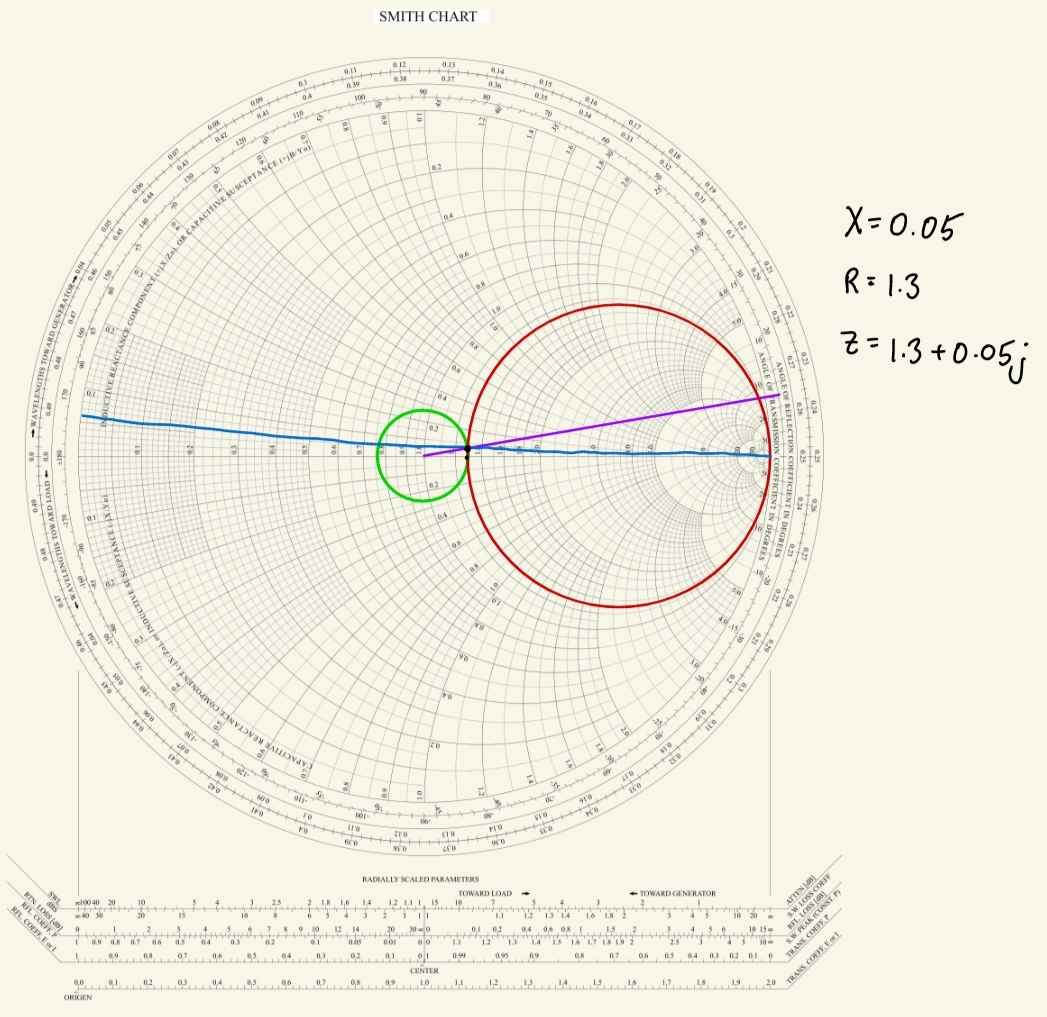

Observations:

- The horn end has the lowest impedance which I think makes sense intuitively because it makes a gradual change from the waveguide to free space
- The closed end has infinite resistance (or at least something very large) which also makes sense since it should have complete reflection
- The open end is in the middle of the other two which I think also makes sense because it is in the middle of the two extremes

I am not completely convinced that my angles are correct, I am still unsure about how the units match up and get radians, so I'll have to take another look. That said, if there was a conversion issue, it should just shift them all over.

# Best match
I think the horn provides the best match to the best match to the guided waves since the impedance is closest to 1 on the Smith chart, which means it has the lowest impedance and is most similar.

Finally to calculate the magnitude of each impedance: